In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np 

1


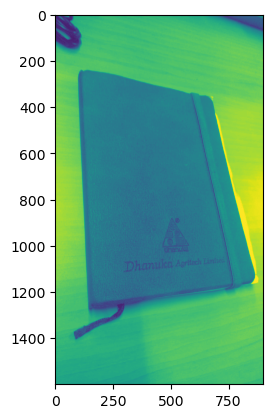

In [31]:
# Open the image files. 
img1_color = cv2.imread("img5.jpg",cv2.IMREAD_COLOR)  # Image to be aligned. 
img2_color = cv2.imread("img3.jpg")    # Reference image. 
print(1)
img1 = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY) 
height, width = img2.shape 
plt.imshow(img1)
plt.imshow(img1)

In [32]:
orb_detector = cv2.ORB_create(5000)

In [33]:
kp1, d1 = orb_detector.detectAndCompute(img1, None) 
kp2, d2 = orb_detector.detectAndCompute(img2, None) 

In [34]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) 

In [39]:
# Match the two sets of descriptors. 
matches = matcher.match(d1, d2) 
matches = list(matches)
# Sort matches on the basis of their Hamming distance. 
matches.sort(key = lambda x: x.distance) 
# Take the top 90 % matches forward. 
matches = matches[:int(len(matches)*0.9)] 
no_of_matches = len(matches) 

In [40]:
# Define empty matrices of shape no_of_matches * 2. 
p1 = np.zeros((no_of_matches, 2)) 
p2 = np.zeros((no_of_matches, 2)) 
  
for i in range(len(matches)): 
  p1[i, :] = kp1[matches[i].queryIdx].pt 
  p2[i, :] = kp2[matches[i].trainIdx].pt 

In [41]:
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC) 
  
# Use this matrix to transform the 
# colored image wrt the reference image. 
transformed_img = cv2.warpPerspective(img1_color, 
                    homography, (width, height)) 
  

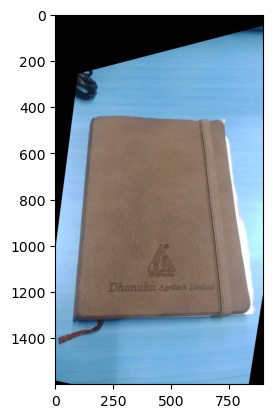

In [43]:
cv2.imwrite('output.jpg', transformed_img) 
plt.imshow(transformed_img)